## Multinomial Logistic Regression Theory

In the previous notebook, we discussed binary logistic regression. In this notebook, we will focus on *multinomial logistic regression*, also called *softmax regression*, where the goal is to train a classifier that can assign observations to one of multiple classes.

This multiclass classification task is sometimes referred to as *hard classification* because each observation can only belong to a single class. This is in contrast to *multilabel classification*, where an observation can belong to multiple classes simultaneously.

To represent the label $y$, one straightforward option is to let $y \in \{1, ..., K\}$, where $K$ is the total number of classes. This representation assumes a natural ordering of the classes, which is useful for *ordinal regression* — for example, predicting human preference levels on a scale from 1–5 (e.g. "very poor" to "excellent").

However, most classification problems do not have an inherent ordering among the classes. In these cases, a more common representation is *one-hot encoding*. The classifier takes a feature vector $\mathbf{x} \in \mathbb{R}^n$ as input and outputs a $K$-dimensional vector $\mathbf{y} \in \{0, 1\}^K$. Let $c$ denote the correct class. In this one-hot representation, we set $y_c = 1$ and all other elements to $0$, i.e. $y_c = 1$ and $y_k = 0\ \forall k \neq c$. A vector with exactly one entry equal to 1 and all others 0 is called a *one-hot vector*.

### Model

In multinomial logistic regression, the goal is to estimate the vector $\hat{\mathbf{y}}$, where for each class $k$, the value $\hat{y}_k$ estimates the probability $p(y_k = 1 \mid \mathbf{x})$ that a given observation belongs to this class.

As in other generalized linear models, we compute these probabilities using a linear function. Specifically, for the $k$-th class:
$$
z_k = \sum_{j=1}^m w_{jk}\, x_j + b_k\,,
$$
which is the formula for the $k$-th element of $\mathbf{z}$. Since the output is a $K$-dimensional vector containing the scores for each class, we need different weights and biases for every class. This can be written compactly as:
$$
\mathbf{z}^{(i)} = \mathbf{W}^T \mathbf{x}^{(i)} + \mathbf{b}\,,
$$
where $\mathbf{W} \in \mathbb{R}^{n \times K}$, $\mathbf{x}^{(i)} \in \mathbb{R}^n$, $\mathbf{b} \in \mathbb{R}^K$, and $\mathbf{z}^{(i)} \in \mathbb{R}^K$.

When dealing with multiple examples at once, we can vectorize this further:
$$
\mathbf{Z} = \mathbf{X}\mathbf{W} + \mathbf{b}\,,
$$
where $\mathbf{X} \in \mathbb{R}^{m \times n}$, $\mathbf{W} \in \mathbb{R}^{n \times K}$, $\mathbf{b} \in \mathbb{R}^K$, and $\mathbf{Z} \in \mathbb{R}^{m \times K}$.

After computing $\mathbf{Z}$, we apply the softmax function to obtain class probabilities.

#### Softmax Function

Any time we wish to represent a probability distribution over a discrete variable with $n$ possible values, we can use the *softmax* function. In our case, the softmax function is used to model the distribution over $K$ different classes.

To transform $\mathbf{z}$ into a valid probability vector $\hat{\mathbf{y}}$, we require two properties: each element $\hat{y}_k$ must lie between 0 and 1, and the entire vector $\hat{\mathbf{y}}$ must sum to 1. The probability $p(y_k = 1 \mid \mathbf{x})$ is then given by:
$$
\hat{y}_k = p(y_k = 1 \mid \mathbf{x}) = softmax(\mathbf{z})_k = \frac{e^{z_k}}{\sum_{l=1}^{K} e^{z_l}} \quad \text{for } 1 \leq k \leq K\,.
$$

Applying the softmax to $\mathbf{z}$ returns a vector itself:
$$
softmax(\mathbf{z}) = \left[\frac{e^{z_1}}{\sum_{l=1}^{K} e^{z_l}}, \frac{e^{z_2}}{\sum_{l=1}^{K} e^{z_l}}, \ldots, \frac{e^{z_K}}{\sum_{l=1}^{K} e^{z_l}}\right]\,,
$$
where the denominator $\sum_{l=1}^{K} e^{z_l}$ normalizes the exponentiated scores into valid probabilities.

The softmax can be thought of as a generalization of the sigmoid function. Indeed, if we restrict ourselves to $K = 2$ classes, we will see that the softmax simplifies to the sigmoid.

It is also important to note that only $K-1$ of the probabilities are separately specifiable. This is because all probabilities must sum to 1, making one probability determined once all the others are fixed. Equivalently, only $K-1$ logits $z_k$ are seperately identifiable. This means we only need $K-1$ logits to fully specify the probability distribution. One intuitive way to see this is that shifting all logits by the same constant leaves the softmax unchanged.

More formally, let $c \in \mathbb{R}$ be any constant and define:
$$
z_k' = z_k + c \quad \text{for all } k\,.
$$
Then:
$$
softmax(\mathbf{z'})_k = \frac{e^{z_k + c}}{\sum_{l=1}^{K} e^{z_l + c}} = \frac{e^c \, e^{z_k}}{e^c \sum_{l=1}^{K} e^{z_l}} = \frac{e^{z_k}}{\sum_{l=1}^{K} e^{z_l}} = softmax(\mathbf{z})_k\,,
$$
which proves that the softmax is *invariant* to constant shifts.

Since the absolute values of the logits do not matter, only their relative differences do. Practically, this means one logit can be fixed to an arbitrary value — often zero — and the other logits are obtained relative to it. To do this, we can set $c = -z_K$ so that:
$$
\begin{align*}
z'_k &= z_k - z_K \quad \text{for } 1 \leq k \leq K\,, \\
z'_K &= 0\,.
\end{align*}
$$

This yields the simplified softmax:
$$
softmax(\mathbf{z})_k = \frac{e^{z'_k}}{e^0 + \sum_{l=1}^{K-1} e^{z'_l}} = \frac{e^{z'_k}}{1+\sum_{l=1}^{K-1} e^{z'_l}} \quad \text{for } 1 \leq k \leq K\,.
$$

In the special case of $K=2$, the softmax simplifies to the sigmoid:
$$
\begin{align*}
softmax(\mathbf{z})_1 &= \frac{e^{z'_1}}{1+e^{z'_1}} = \frac{1}{1+e^{-z'_1}} = \sigma(z'_1) = \sigma(z)\,, \\
softmax(\mathbf{z})_2 &= \frac{1}{1+e^{z'_1}} = 1-\sigma(z'_1) = 1-\sigma(z)\,.
\end{align*}
$$

### Decision Rule

As mentioned earlier, the computed vector $\hat{\mathbf{y}}$ consists of elements $\hat{y}_k$, which represent the estimated probability for each class. Each $\hat{y}_k$ lies between 0 and 1, and all of them sum to 1.

To classify an input into one of the classes, we simply pick the class with the highest estimated probability. Formally, this can be written as:
$$
\hat{c} = \arg\max_{k} \hat{y}_k\,,
$$
where $\hat{c}$ denotes the predicted class index.

### Loss Function

#### Negative Log-Likelihood Function

Recall that in binary logistic regression we use the negative log-likelihood (NLL) as the loss function. This is motivated by maximum likelihood estimation and corresponds to the cross-entropy between the empirical distribution and the model's predicted distribution:
$$
L(\mathbf{w}, b) = -\left( y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right)\,.
$$

In multinomial logistic regression, we also use the NLL loss, but it generalizes the two terms present in the binary case to $K$ terms — one for each class. Unlike in the binary case, $\mathbf{y}$ and $\hat{\mathbf{y}}$ are now vectors with $K$ elements. Specifically, $\mathbf{y}$ is a one-hot encoded vector, with $y_c = 1$ if $c$ is the correct class and all other elements set to 0. The vector $\hat{\mathbf{y}}$ contains the model’s estimated probabilities, where each $\hat{y}_k$ is the estimated probability $p(y_k = 1 \mid \mathbf{x})$ for class $k$.

The generalized NLL for a single example is then the sum of the log-probabilities of all classes, weighted by $y_k$, which acts as an indicator selecting the correct class:
$$
\begin{align*}
L(\mathbf{W}, \mathbf{b}) &= - \sum_{k=1}^K y_k^{(i)} \log \hat{y}_k^{(i)}\,.
\end{align*}
$$

Since $y_k$ is 1 only for the correct class $c$, this simplifies to the negative log-probability of the correct class:
$$
L(\mathbf{W}, \mathbf{b}) = -\log \hat{y}_c\,.
$$

Finally, the average cost over the entire training set is:
$$
J(\mathbf{W},\mathbf{b}) = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log \hat{y}_k^{(i)}\,.
$$

### Gradient Descent

We use the mini-batch stochastic gradient descent algorithm to update the parameters. For this, we split the training set into mini-batches
$$
B = \{\mathbf{x}^{(1)}, \mathbf{x}^{(2)}, \dots, \mathbf{x}^{(m')}\}
$$
of fixed size $m'$, and we compute the gradients using only the data in each mini-batch.

The gradient of the loss with respect to the weight matrix $\mathbf{W}$ and bias vector $\mathbf{b}$ for an example $(\mathbf{x}, \mathbf{y})$ is again computed via the chain rule:
$$
\frac{\partial L}{\partial (\mathbf{W}, \mathbf{b})} = \frac{\partial L}{\partial \hat{\mathbf{y}}} \frac{\partial \hat{\mathbf{y}}}{\partial \mathbf{z}} \frac{\partial \mathbf{z}}{\partial (\mathbf{W}, \mathbf{b})}\,.
$$

Before we proceed in computing the derivatives, it is useful to know that the derivative of a scalar function ($L$) with respect to a vector ($\hat{\mathbf{y}}$) is a vector, the derivative of a vector function ($\hat{\mathbf{y}}$) with respect to a vector ($\mathbf{z}$) is a matrix (also known as the Jacobian matrix), and the derivative of a vector function $\mathbf{z}$ with respect to a matrix $\mathbf{W}$ is a third-order tensor.

While vectorization is more computationally efficient, for educational purposes we will also go step-by-step and compute the gradients with respect to a specific weight and bias on a single example.

Let's start with the first two partial derivatives:
$$
\frac{\partial L}{\partial z_t} = \sum_{k=1}^K \frac{\partial L}{\partial \hat{y}_k} \frac{\partial \hat{y}_k}{\partial z_t}\,,
$$
where $t$ represents the $t$-th class element of $\mathbf{z}$ with respect to which we are taking the derivative. Take note of the sum over all the class elements — this is not to be confused with the sum inside the loss function $L$. It appears due to the multivariate chain rule, since each element of the softmax $\hat{\mathbf{y}}$ depends on every element of $\mathbf{z}$ in its denominator. This also happens in the vectorized form when performing matrix multiplication.

We begin by computing:
$$
\frac{\partial L}{\partial \hat{y}_k} = - \frac{\partial}{\partial \hat{y}_k} \sum_{k=1}^K y_k \log \hat{y}_k = - \frac{y_k}{\hat{y}_k}\,.
$$

In vectorized form:
$$
\frac{\partial L}{\partial \hat{\mathbf{y}}} = - 
\begin{pmatrix}
\frac{\partial}{\partial \hat{y}_1} \sum_{k=1}^K y_k \log \hat{y}_k \\
\vdots \\
\frac{\partial}{\partial \hat{y}_k} \sum_{k=1}^K y_k \log \hat{y}_k
\end{pmatrix}
=
- 
\begin{pmatrix}
\frac{y_1}{\hat{y}_1} \\
\vdots \\
\frac{y_k}{\hat{y}_k}
\end{pmatrix}\,.
$$

Next, we need:
$$
\frac{\partial \hat{y}_k}{\partial z_t} = \frac{\partial}{\partial z_t} \frac{e^{z_k}}{\sum_{l=1}^K e^{z_l}}\,.
$$

Applying the quotient rule $\left(\frac{u}{v}\right)' = \frac{u' v - u v'}{v^2}$:
$$
\frac{\partial \hat{y}_k}{\partial z_t} = \frac{\frac{\partial e^{z_k}}{\partial z_t} \sum_{l=1}^K e^{z_l} - e^{z_k} \frac{\partial \sum_{l=1}^K e^{z_l}}{\partial z_t}}{\left(\sum_{l=1}^K e^{z_l}\right)^2}\,.
$$

Compute the two terms:
$$
\begin{align*}
\frac{\partial e^{z_k}}{\partial z_t} &=
\begin{cases}
e^{z_k}, & \text{if } k=t \\
0, & \text{otherwise}
\end{cases}
\\
&= 1\{k=t\} e^{z_k}\,,
\end{align*}
$$
and
$$
\frac{\partial \sum_{l=1}^K e^{z_l}}{\partial z_t} = e^{z_t}\,.
$$

Plugging these back into the expression:
$$
\begin{align*}
\frac{\partial \hat{y}_k}{\partial z_t} &= \frac{\frac{\partial e^{z_k}}{\partial z_t} \sum_{l=1}^K e^{z_l} - e^{z_k} \frac{\partial \sum_{l=1}^K e^{z_l}}{\partial z_t}}{(\sum_{l=1}^K e^{z_l})^2}\\
&= \frac{1\{k=t\} e^{z_k} \sum_{l=1}^K e^{z_l} - e^{z_k} e^{z_t}}{(\sum_{l=1}^K e^{z_l})^2} \\
&= \frac{e^{z_k}}{\sum_{l=1}^K e^{z_l}} \left(\frac{1\{k=t\} \sum_{l=1}^K e^{z_l}}{\sum_{l=1}^K e^{z_l}} - \frac{e^{z_t}}{\sum_{l=1}^K e^{z_l}} \right) \\
&= \frac{e^{z_k}}{\sum_{l=1}^K e^{z_l}} \left(1\{k=t\} - \frac{e^{z_t}}{\sum_{l=1}^K e^{z_l}} \right) \\
&= \hat{y}_k (1\{k=t\} - \hat{y}_t) \,.
\end{align*}
$$

In the vectorized case for $K=3$, this Jacobian looks like:
$$
\frac{\partial \hat{\mathbf{y}}}{\partial \mathbf{z}} =
\begin{pmatrix}
\hat{y}_1 (1-\hat{y}_1) & -\hat{y}_1 \hat{y}_2 & -\hat{y}_1 \hat{y}_3 \\
-\hat{y}_2 \hat{y}_1 & \hat{y}_2 (1-\hat{y}_2) & -\hat{y}_2 \hat{y}_3 \\
-\hat{y}_3 \hat{y}_1 & -\hat{y}_3 \hat{y}_2 & \hat{y}_3 (1-\hat{y}_3)
\end{pmatrix}\,.
$$

Notice that on the diagonal the indicator function returns 1 (when $k=t$), and 0 elsewhere.

Now let’s put it together and simplify:
$$
\begin{align*}
\frac{\partial L}{\partial z_t} &= - \sum_{k=1}^K \frac{y_k}{\hat{y}_k} \hat{y}_k (1\{k=t\} - \hat{y}_t) \\
&= - \sum_{k=1}^K y_k (1\{k=t\} - \hat{y}_t) \\
&= \sum_{k=1}^K y_k \hat{y}_t - \sum_{k=1}^K y_k 1\{k=t\} \\
&= \sum_{k=1}^K y_k \hat{y}_t - y_t \\
&= \hat{y}_t \sum_{k=1}^K y_k - y_t \\
&= \hat{y}_t - y_t \,.
\end{align*}
$$

Note that in the forth step the only $y_k$ that doesn't get zeroed out by the indicator function is $y_t$ and in the last step $\sum_{k=1}^K y_k = 1$ since $\mathbf{y}$ is a one-hot vector

In vectorized form:
$$
\frac{\partial L}{\partial \mathbf{z}} = \hat{\mathbf{y}} - \mathbf{y}\,.
$$

Next we compute the remaining derivatives:
$$
\frac{\partial z_t}{\partial w_{jt}} = \frac{\partial}{\partial w_{jt}} (w_{jt} x_j + b_t) = x_j
$$
and
$$
\frac{\partial z_t}{\partial b_{t}} = \frac{\partial}{\partial b_{t}} (w_{jt} x_j + b_{t}) = 1\,.
$$

In vectorized form:
$$
\frac{\partial \mathbf{z}}{\partial \mathbf{W}} = \mathbf{x}\quad\text{and}\quad\frac{\partial \mathbf{z}}{\partial \mathbf{b}} = \mathbf{1}\,.
$$

Recall that the derivative of a vector with respect to a matrix is a third-order tensor, so these derivatives are incorrect. However in our case this is a useful abstraction, because each element $z_t$ depends only on the corresponding column of $\mathbf{W}$ and element of $\mathbf{b}$, all other terms in the tensor will be zero. Hence we can simplify the gradient with respect to $\mathbf{W}$ considerably by taking the outer product of $\mathbf{x}$ and the transpose of rest of the computed derivatives:

$$
\frac{\partial L}{\partial w_{jt}} = x_j (\hat{y}_t - y_t)\,, \qquad \frac{\partial L}{\partial \mathbf{W}} = \mathbf{x} (\hat{\mathbf{y}} - \mathbf{y})^T\,,
$$
and
$$
\frac{\partial L}{\partial b_{t}} = \hat{y}_t - y_t\,, \qquad \frac{\partial L}{\partial \mathbf{b}} = \hat{\mathbf{y}} - \mathbf{y}\,.
$$

Keep in mind that the order of the derivatives and which derivative should be transposed depends on the shapes of our matrices and vectors. Our $\mathbf{W}$ has shape $n \times K$, so $\mathbf{x}$ must be $n \times 1$ and $(\hat{\mathbf{y}} - \mathbf{y})$ is $1 \times K$, resulting in a matching $n \times K$ gradient with respect to $\mathbf{W}$.

When computing the gradient over multiple examples in a mini-batch, we use $\mathbf{X}$ of shape $m' \times n$ and $(\hat{\mathbf{Y}} - \mathbf{Y})$ of shape $m' \times K$, so $\mathbf{X}$ needs to be transposed:
$$
\begin{align*}
g_{\mathbf{W}} &= \frac{1}{m'} \sum_{i=1}^{m'} \mathbf{x}^{(i)} (\mathbf{\hat{y}}^{(i)} - \mathbf{y}^{(i)})^T \\
&= \frac{1}{m'} \mathbf{X}^T (\mathbf{\hat{Y}} - \mathbf{Y}) \,, \\
\\
g_{\mathbf{b}} &= \frac{1}{m'} \sum_{i=1}^{m'} \mathbf{\hat{y}}^{(i)} - \mathbf{y}^{(i)}\,.
\end{align*}
$$

### Evaluation Metrics

Just as in binary logistic regression, commonly used evaluation metrics for multinomial logistic regression are **accuracy**, **precision**, **recall**, and **F1 score**. For multiclass problems, precision, recall, and F1 score are calculated separately for each class to assess per-class performance. Additionally, macro-averaged versions of these metrics are often used, which compute the unweighted mean across all classes, providing a balanced view of overall model effectiveness regardless of class imbalance.

## Multinomial Logistic Regression Implementation from Scratch

In [329]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

We use the Iris dataset to demonstrate multinomial logistic regression because it is a well-known, clean, and balanced dataset that includes three distinct classes — Setosa, Versicolor, and Virginica — making it ideal for multiclass classification. By loading the dataset as a frame, we also gain access to `DESCR`, which provides a full textual description of the dataset, including feature names, class distribution, and references — helpful for quick insights and documentation.

In [309]:
iris_sklearn = load_iris(as_frame=True)
print(iris_sklearn.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

We convert the loaded dataset to a pandas DataFrame to leverage pandas’ powerful data inspection tools. Using `head()`, `info()`, and `describe()`, we can quickly verify that the dataset is clean — there are no missing values, and all columns have appropriate data types. This ensures we can proceed directly to preprocessing and modeling without additional cleaning steps.

In [310]:
iris: pd.DataFrame= iris_sklearn.frame
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [311]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [312]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We separate the features (`X`) from the target (`y`) to prepare for model training. The target variable is then one-hot encoded. Finally, both `X` and `y` are converted to NumPy arrays to facilitate efficient matrix operations during model implementation.

In [313]:
X: pd.DataFrame = iris.drop("target", axis=1)
y: pd.Series = iris["target"]

In [314]:
def onehot_encode(y: pd.Series) -> pd.DataFrame:
    nunique = y.nunique()
    value_counts = y.value_counts()
    onehot_cols = [value_counts.index[i] for i in range(nunique)]
    onehot_df = pd.DataFrame(np.zeros(shape=(y.shape[0], nunique)), columns=onehot_cols)
    onehot_df.set_index(y.index)

    for col_id, cat in enumerate(value_counts.index):
        row_ids = y[y == cat].index
        onehot_df.loc[np.array(row_ids), onehot_cols[col_id]] = 1
        
    return onehot_df

In [315]:
y: pd.DataFrame = onehot_encode(y)

In [316]:
X: np.ndarray = X.to_numpy()
y: np.ndarray = y.to_numpy()

We define the needed hyperparameters. The seed is optional and can be set for reproducibility.

In [317]:
# np.random.seed(42)

epochs = 1000
batch_size = 32
eta = 0.1
val_split = 0.1
split_ratio = 0.75
feature_dim = X.shape[1]
output_dim = y.shape[1]

To ensure that the training and test sets are representative and unbiased, we first shuffle the dataset using a random permutation of indices. This helps avoid any patterns or ordering in the original data that could influence model training. We then split the dataset into training and test sets based on a specified split ratio.

In [318]:
def shuffle_data(X: np.ndarray, y: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    shuffle_indices = np.random.permutation(len(X))
    X, y = X[shuffle_indices], y[shuffle_indices]

    return X, y

In [319]:
X, y = shuffle_data(X, y)

In [320]:
def split_dataset(X: np.ndarray, y: np.ndarray, split_ratio: float) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    split_size = int(len(X) * split_ratio)
    X_train = X[:split_size]
    y_train = y[:split_size]
    X_test = X[split_size:]
    y_test = y[split_size:]

    return X_train, y_train, X_test, y_test

In [321]:
X_train, y_train, X_test, y_test = split_dataset(X, y, split_ratio)

We define a base `Loss` class that provides a method to compute the mean loss over all samples. The `CategoricalCrossEntropy` subclass implements the NLL loss. It also includes a `gradient` method that calculates the gradients of the loss with respect to the model’s weights and biases.

In [322]:
class Loss:
    def mean_loss(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        losses: np.ndarray = self(y_true, y_pred)
        mean_loss = np.sum(losses) / len(losses)

        return mean_loss

In [323]:
class CategoricalCrossEntropy(Loss):
    def __call__(self, y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
        losses = -1 * np.sum(y_true*np.log(y_pred), axis=1)
        return losses
    
    def gradient(self, y_true: np.ndarray, y_pred: np.ndarray, X: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
        grad_w = np.matmul(X.transpose(), y_pred - y_true) / len(X)
        grad_b = np.sum((y_pred - y_true), axis=0) / len(X)
        return grad_w, grad_b

The model is structured in a modular way using two classes: `MLogRModule` and `MLogRModel`. The base class `MLogRModule` provides general training, prediction, and evaluation functionality that is independent of the actual implementation of the forward pass. This allows for reusability and easy extension.

The subclass `MLogRModel` handles the actual computation of the logits and softmax probabilities. It initializes the weights and biases, defines the softmax activation, and implements the forward pass in the `__call__` method. 

A numerically stable version of the softmax function is used:
```python
a = np.exp(z - np.max(z, axis=1)[:, None])
result = a / np.sum(a, axis=1)[:, None]
```
By subtracting the maximum logit value from each row `np.max(z, axis=1)`, we prevent potential overflow issues that can occur when applying the exponential function to large values. This improves numerical stability. Recall that this can be done because the softmax is invariant to constant shifts. 


In [324]:
class MLogRModule:
    def __init__(self):
        self.loss = CategoricalCrossEntropy()
    
    def fit(self, X: np.ndarray, y: np.ndarray, epochs: int, batch_size: int = 1, eta: float = 0.01, val_split: float = None) -> tuple[list[float], list[float]]:
        if val_split:
                split_size = int(len(X) * val_split)
                X_val = X[:split_size]
                y_val = y[:split_size]
                X = X[split_size:]
                y = y[split_size:]
    
        batches = [(X[i : i + batch_size], y[i : i + batch_size]) for i in range(0, len(X), batch_size)]
        
        losses = []
        val_losses = []
        for i in range(epochs):
            loss = 0
            for X_batch, y_true in batches:
                y_pred = self(X_batch)
                loss += self.loss.mean_loss(y_true, y_pred)
                grad_w, grad_b = self.loss.gradient(y_true, y_pred, X_batch)
                self.w -= eta * grad_w
                self.b -= eta * grad_b

            if val_split:
                y_pred_val = self(X_val)
                val_loss = self.loss.mean_loss(y_val, y_pred_val)
                print(f"Epoch {i}: Loss {loss/len(batches)}, Val-Loss {val_loss}")
                val_losses.append(val_loss)
            else:
                print(f"Epoch {i}: Loss {loss/len(batches)}")
                
            losses.append(loss/len(batches))

        return losses, val_losses

    def predict(self, X: np.ndarray) -> np.ndarray:
        y_pred = self(X)
        
        return (y_pred == np.max(y_pred, axis=1)[:, None]).astype(int)
  
    def evaluate(self, y_pred: np.ndarray, y_true: np.ndarray, classes: list = None, show_report: bool = True) -> dict:
        num_classes = y_true.shape[1]
        y_pred = np.argmax(y_pred, axis=1)
        y_true = np.argmax(y_true, axis=1)

        report = {
            "accuracy": None,
            "macro avg": {"precision": None, "recall": None, "f1-score": None},
            "class metrics": {}
        }

        precisions, recalls, f1s = [], [], []

        for cls in range(num_classes):
            tp = np.sum((y_pred == cls) & (y_true == cls))
            fp = np.sum((y_pred == cls) & (y_true != cls))
            fn = np.sum((y_pred != cls) & (y_true == cls))

            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            f1 = (2 * precision * recall) / (precision + recall)

            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)

            report["class metrics"][classes[cls] if classes else cls] = {
                "precision": round(precision, 2),
                "recall": round(recall, 2),
                "f1-score": round(f1, 2)
            }

        accuracy = np.sum(y_pred == y_true) / len(y_true)
        report["accuracy"] = round(accuracy, 2)
        report["macro avg"]["precision"] = round(np.mean(precisions), 2)
        report["macro avg"]["recall"] = round(np.mean(recalls), 2)
        report["macro avg"]["f1-score"] = round(np.mean(f1s), 2)

        if show_report:
            print(f"{'Class':<12} {'Precision':<10} {'Recall':<10} {'F1-score':<10}")
            for cls, metrics in report["class metrics"].items():
                print(f"{cls:<12} {metrics['precision']:<10} {metrics['recall']:<10} {metrics['f1-score']:<10}")
            print(f"\n{'Macro avg':<12} {report['macro avg']['precision']:<10} {report['macro avg']['recall']:<10} {report['macro avg']['f1-score']:<10}")
            print(f"{'Accuracy':<12} {report['accuracy']:<10}")

        return report

In [325]:
class MLogRModel(MLogRModule):
    def __init__(self, feature_dim: int, output_dim: int = 1):
        super().__init__()
        self.w: np.ndarray = np.random.normal(size=(feature_dim, output_dim))
        self.b: np.ndarray = np.random.normal(size=output_dim)
    
    def softmax(self, z: np.ndarray) -> np.ndarray:
        a = np.exp(z - np.max(z, axis=1)[:, None])
        result = a / np.sum(a, axis=1)[:, None]
    
        return result
        
    def __call__(self, X: np.ndarray) -> np.ndarray:
        z = np.dot(X, self.w) + self.b
        y_pred = self.softmax(z)
                    
        return y_pred 

The multinomial logistic regression model is instantiated by specifying the input feature dimension and the number of output classes. The `fit` method is then called with the training data and training hyperparameters. This initiates the training loop.

In [326]:
model = MLogRModel(feature_dim, output_dim)
history, val_history = model.fit(X_train, y_train, epochs, batch_size, eta, val_split)

Epoch 0: Loss 12.049905269948152, Val-Loss 2.3584511002150794
Epoch 1: Loss 1.7246276216685135, Val-Loss 1.4489639765451425
Epoch 2: Loss 1.7083175235176395, Val-Loss 1.3461726772663194
Epoch 3: Loss 1.3844331899596591, Val-Loss 1.1633235095455847
Epoch 4: Loss 1.2333538685215766, Val-Loss 1.1386140184547449
Epoch 5: Loss 1.1536264242793848, Val-Loss 1.058587873733557
Epoch 6: Loss 1.092523464866682, Val-Loss 1.038910037721823
Epoch 7: Loss 1.05882896534281, Val-Loss 1.0247845173646397
Epoch 8: Loss 1.0333386949004002, Val-Loss 1.0144056420311895
Epoch 9: Loss 1.0129754281248233, Val-Loss 1.002933846550132
Epoch 10: Loss 0.9947323086742623, Val-Loss 0.9898444878414623
Epoch 11: Loss 0.9775107166723768, Val-Loss 0.9755153961562685
Epoch 12: Loss 0.9608844562969904, Val-Loss 0.9604312329746598
Epoch 13: Loss 0.9446950209216802, Val-Loss 0.9449644750749727
Epoch 14: Loss 0.9288804198777177, Val-Loss 0.9293645852869613
Epoch 15: Loss 0.913412931890675, Val-Loss 0.9137922268203618
Epoch 16:

We use seaborn’s `relplot` to visualize the loss curves over epochs for both training and validation sets. This plot helps to monitor how the model’s performance evolves during training and can reveal issues like overfitting if the validation loss starts to increase while training loss continues to decrease.

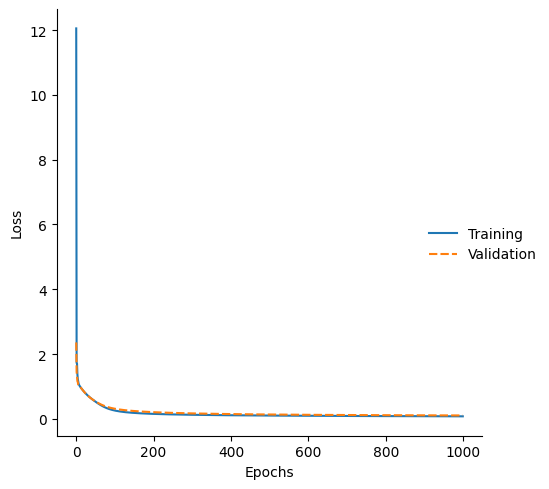

In [327]:
plot: sns.FacetGrid = sns.relplot(data=(history, val_history), kind="line")
plt.xlabel("Epochs")
plt.ylabel("Loss")
new_labels = ['Training', 'Validation']
for texts, labels in zip(plot._legend.texts, new_labels):
    texts.set_text(labels)

After training, predictions are made on the test set using the model’s `predict` method. The evaluation is then performed with the `evaluate` method, which generates a classification report similar in style to scikit-learn’s `classification_report`. This includes per-class precision, recall, F1-scores, and overall accuracy, providing a comprehensive overview of the model’s performance.

In [328]:
y_pred = model.predict(X_test)
classes = ['Setosa', 'Versicolor', 'Virginica']
report = model.evaluate(y_pred, y_test, classes)


Class        Precision  Recall     F1-score  
Setosa       1.0        1.0        1.0       
Versicolor   0.94       0.94       0.94      
Virginica    0.91       0.91       0.91      

Macro avg    0.95       0.95       0.95      
Accuracy     0.95      


## Conclusion

In this notebook, we explored multinomial logistic regression both from a theoretical perspective and through a complete implementation from scratch. We used the well-known Iris dataset, which provides a clear and manageable example for demonstrating multiclass classification. While this dataset allowed us to focus on the core concepts and mechanics of multinomial logistic regression, real-world applications typically require more extensive exploratory data analysis (EDA), feature engineering, and often additional techniques to handle complexities such as imbalanced classes, noisy data, or non-linear decision boundaries.


## References

Jurafsky, D., & Martin, J. H. (2025). *Speech and language processing* (Draft of January 12, 2025, Chapter 5: Logistic Regression). Retrieved from https://web.stanford.edu/~jurafsky/slp3/5.pdf

Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep learning*. MIT Press. Retrieved from https://www.deeplearningbook.org/

Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2022). *Dive into deep learning*. Retrieved from https://d2l.ai/chapter_linear-classification/softmax-regression.html

Ng, A. (2018). *Lecture 3 - Locally Weighted & Logistic Regression* [Video]. YouTube. Stanford CS229: Machine Learning. Retrieved from 
https://www.youtube.com/watch?v=het9HFqo1TQ&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=3

Ng, A. (2018). *Lecture 4 - Perceptron & Generalized Linear Model* [Video]. YouTube. Stanford CS229: Machine Learning. Retrieved from
https://www.youtube.com/watch?v=iZTeva0WSTQ&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=4

<br/><br/>
Some additional sources covering different approaches to deriving the loss in multinomial logistic regression are listed below. These are not scientific papers or formal articles, so use them with caution.

Kurbiel, T. (2019). *Derivative of the Softmax Function and the Categorical Cross-Entropy Loss*. Retrieved from https://medium.com/data-science/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1

JMLB. (2017). *Derivation of the Gradient of the cross-entropy Loss*. Retrieved from https://jmlb.github.io/ml/2017/12/26/Calculate_Gradient_Softmax/

Meerkat Statistics. (2023). *NN - 10 - Cross Entropy and Softmax - Derivatives* [Video]. YouTube. Retrieved from https://www.youtube.com/watch?v=rf4WF-5y8uY
